# This is notebook to do basic calculations for array design


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# Define Parameters

chan_width = 10 # kHz
start_nu = 400 # MHz
end_nu = 1600 # MHz
num_chan = int((end_nu-start_nu)/chan_width*1000)
nu_array=np.linspace(start_nu,end_nu,num_chan)

obs_nu = 800 # MHz
D = 2 # Meters
lam = 3.e8/800.e6
theta = lam / D # rad
theta_deg = theta * 180/np.pi 

print(lam, 'm', theta_deg, 'deg')

0.375 m 10.742958658702936 deg


In [128]:
D_array = np.linspace(0.5,25,200)
nu_array = 300/lam_array
lam_array = np.linspace(0.2,1,100)
lamd_array = np.meshgrid(D_array, lam_array)
theta_array = lamd_array[1]/lamd_array[0]
theta_deg_array = theta_array * 180/np.pi 
print(nu_array.shape,D_array.shape)

(100,) (200,)


[89]


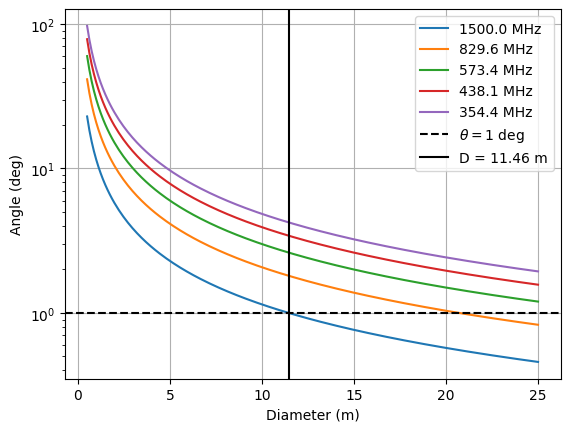

In [129]:
D_idx=np.where(abs(theta_deg_array[0]-1)==np.min(abs(theta_deg_array[0]-1)))[0]
print(D_idx)
for i in range(5):
    plt.plot(D_array, theta_deg_array[20*i],label=str(np.round(nu_array[20*i],1))+' MHz')
plt.xlabel('Diameter (m)')
plt.ylabel('Angle (deg)')
# plt.xscale('log')
plt.yscale('log')
plt.axhline(y=1,linestyle='--',color='k',label='$\\theta=$1 deg')
plt.axvline(x=D_array[D_idx],color='k',label='D = '+str(np.round(D_array[D_idx][0],2))+' m')
plt.legend()
plt.grid()

In [186]:
"""
Calculation given a sentitvity level compute the antenna surface area

"""

min_S = 1.e4 # 0.1 SFU 
Tsys = 350 # in K
sigma_dec =5
tau=0.001 # in sec
BW = 10.e3 # 10 kHz
del_Srms = min_S/sigma_dec
tauBW = np.sqrt(tau*BW)
print('sqrt(tau*BW) =',tauBW)
A = 2*1380*Tsys/del_Srms/tauBW # in sq. mts
SEFD = 2*1380/A # in Jy
dish_diameter = np.sqrt(4*A/np.pi)
print('Area:',A,'sq. m ','SEFD:',SEFD,' Jy')
print('Dish diameter:', dish_diameter)

lf=400 # lower end frequency (MHz)
hf=1600 # high end frequency
lang = (3.e2/lf)/dish_diameter*180/np.pi
hang = (3.e2/hf)/dish_diameter*180/np.pi
print('Angle range',hang,' to ',lang)

nchan = (hf-lf)*1.e6/BW # number of channels for 400 MHz to 1600 MHz
nbytes = 2
data_rate = nchan*nbytes/tau
print('Data Rates:',data_rate/1.e6,'Mbytes s$^{-1}$ ','nchan:',nchan)

selfnoise = min_S / (np.sqrt(1)*tauBW)
print('Self-Noise:', selfnoise/1.e4, 'SFU',' factor:',tauBW)


sqrt(tau*BW) = 10.0
Area: 48.3 sq. m  SEFD: 57.142857142857146  Jy
Dish diameter: 7.842032262794406
Angle range 1.369920232242812  to  5.479680928971248
Data Rates: 24.0 Mbytes s$^{-1}$  nchan: 12000.0
Self-Noise: 0.1 SFU  factor: 10.0


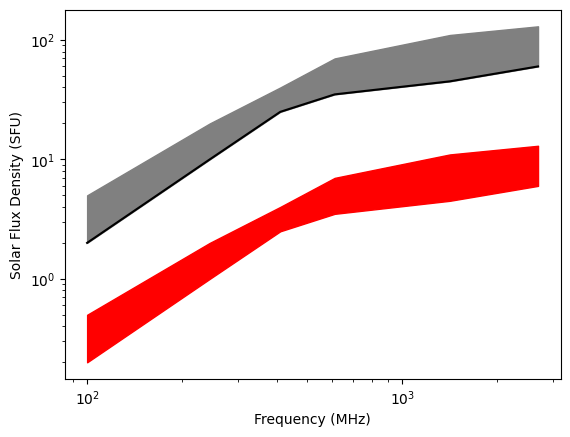

In [154]:
freq = np.array([100,245,410,610,1415,2695])
qs_flux_min = np.array([2,10,25,35,45,60])
qs_flux_max = np.array([5,20,40,70,110,130])

sn_qs_flux_min = qs_flux_min/tauBW
sn_qs_flux_max = qs_flux_max/tauBW

f,ax = plt.subplots(1,1)
ax.plot(freq,qs_flux_min,color='k')
ax.set_ylabel('Solar Flux Density (SFU)')
ax.set_xlabel('Frequency (MHz)')
ax.fill_between(freq,qs_flux_min,qs_flux_max,color='gray')
ax.fill_between(freq,sn_qs_flux_min,sn_qs_flux_max,color='red')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()



SEFD:  1.229949400214167 SFU
37819.388177179724


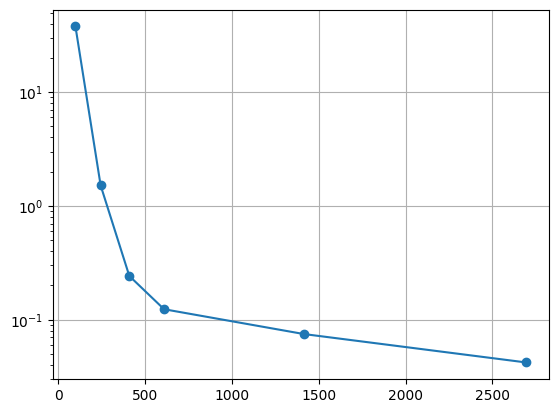

In [176]:
ndish = 1
dish_diameter = 10 # in mts
A = ndish*np.pi*dish_diameter**2 /4.0
Tsys = 350 # in K
SEFD = 2*1380*Tsys/A/1.e4
print('SEFD: ',SEFD, 'SFU')

#self noise ns = S / \sqrt(B*t)
tau=0.001
B = SEFD**2 / (sn_qs_flux_min**2 * tau)
print(B.max())
f,ax=plt.subplots(1,1)
ax.plot(freq,B/1000.,'o-')
ax.set_yscale('log')
ax.grid()
plt.show()

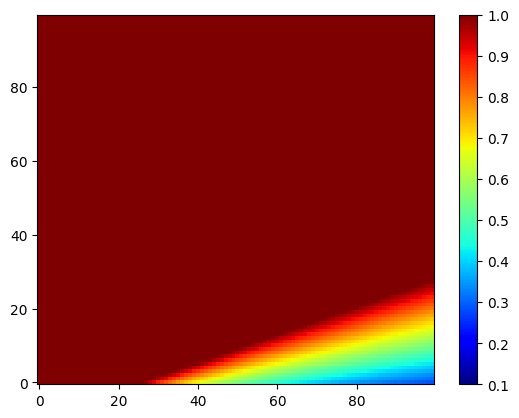

In [30]:
f,ax=plt.subplots(1,1)
im1=ax.imshow(theta_deg_array,origin='lower',cmap='jet',vmin=0.1,vmax=1.0,aspect='auto')
#ax.set_yscale('log')
#ax.set_xscale('log')
f.colorbar(im1)